In [585]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score,fbeta_score,log_loss,confusion_matrix,classification_report,make_scorer,balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_curve,auc,recall_score,roc_auc_score,average_precision_score,precision_score,precision_recall_curve
from sklearn.model_selection import GridSearchCV, learning_curve
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import (OneHotEncoder, PowerTransformer, StandardScaler)

In [586]:
df= pd.read_csv(r"C:\Users\THINKPAD\Desktop\New folder\.venv\predictive maintenance analysis\MDT32_final_project_dataset.csv")
n = df.shape[0]

In [587]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [588]:
from sklearn.preprocessing import LabelBinarizer
labelBinarizer = LabelBinarizer()
encoded_results_1 = labelBinarizer.fit_transform(df["Failure Type"]) 

In [589]:
encoded_results_1

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [590]:
df_encoded_1 = pd.DataFrame(encoded_results_1, columns=labelBinarizer.classes_)

In [591]:
encoded_results_2 = labelBinarizer.fit_transform(df["Type"]) 

In [592]:
df_encoded_2 = pd.DataFrame(encoded_results_2, columns=labelBinarizer.classes_)

In [593]:
df1 = pd.concat([df, df_encoded_1, df_encoded_2], axis=1)

In [594]:
print('Features non-null values and data type:')
df.info()
print('Check for duplicate values:',
      df['Product ID'].unique().shape[0]!=n)

Features non-null values and data type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
Check for duplicate values: False


In [595]:
df1.drop(['Product ID',"UDI","Type","Failure Type"], axis=1, inplace=True)

In [596]:
df1

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,H,L,M
0,298.1,308.6,1551,42.8,0,0,0,1,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,0,0,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,0,1,0,0,0,0,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,0,0,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,0,1,0,0,0,0,1,0,0


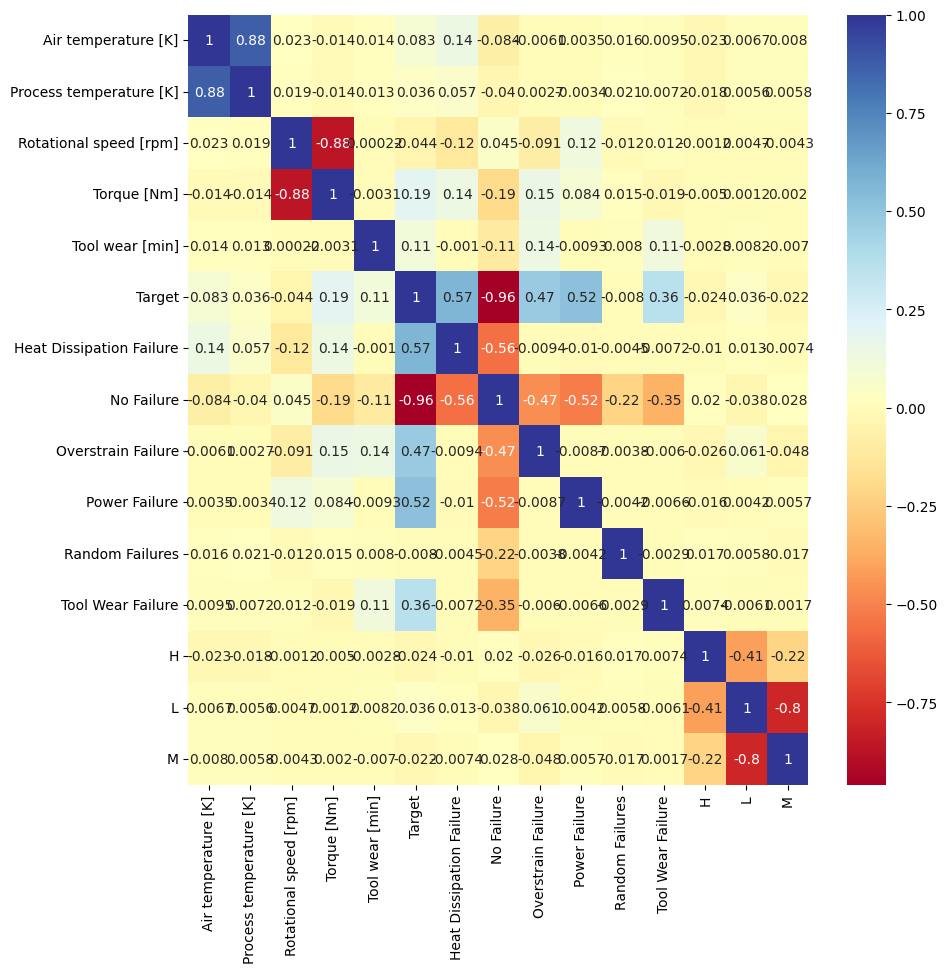

In [597]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,cmap="RdYlBu")
plt.draw()

In [599]:
df1.isnull().values.any()

False

<Axes: xlabel='No Failure', ylabel='count'>

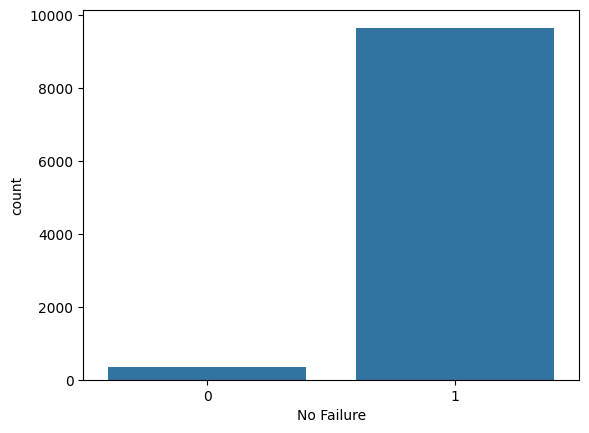

In [600]:
sns.countplot(data=df1,x="No Failure")

In [601]:
df1

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,H,L,M
0,298.1,308.6,1551,42.8,0,0,0,1,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,0,0,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,0,1,0,0,0,0,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,0,0,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,0,1,0,0,0,0,1,0,0


In [602]:
DF = df1[['Air temperature [K]',
          'Process temperature [K]',
          'Rotational speed [rpm]',
          'Torque [Nm]',
          'Tool wear [min]','No Failure','Heat Dissipation Failure','Overstrain Failure','Power Failure','Tool Wear Failure',
          'Random Failures']]

In [603]:
DF

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,1,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,1,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,0,0


In [604]:
DF.columns = DF.columns.astype("str")

In [605]:
col_name = DF.columns.to_list()

In [606]:
col_name

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'No Failure',
 'Heat Dissipation Failure',
 'Overstrain Failure',
 'Power Failure',
 'Tool Wear Failure',
 'Random Failures']

In [607]:
DF = DF.reset_index(drop=True)

In [608]:
DF

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,1,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,1,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,0,0


In [609]:
X = DF.values[:, 0:8].astype("float")
Y = DF.values[:, 8:].astype("int")
print(X.shape)
print(Y.shape)

(10000, 8)
(10000, 3)


In [610]:
x_train, x1_test, y_train, y_test = train_test_split(X,Y, test_size=0.33)

In [415]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state=42)
x1_res, y1_res = smote.fit_resample(x,y)

In [416]:
y_train.shape

(6700, 3)

In [417]:
y_test.shape

(3300, 3)

In [611]:
scaler = StandardScaler().fit(x_test)

In [419]:
lgbm = LGBMClassifier()

In [420]:
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier


In [421]:
model_lgb = MultiOutputClassifier(estimator= lgbm, n_jobs=None)

In [422]:
chain_lgbm = ClassifierChain(lgbm, order='random', random_state=0)

In [423]:
model_lgb_pred = chain_lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 13, number of negative: 6687
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 6700, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001940 -> initscore=-6.242971
[LightGBM] [Info] Start training from score -6.242971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [440]:
print(model_lgb_pred.score(x1_test, y_test))

0.9975757575757576


In [442]:
yhat_lgb = model_lgb_pred.predict(x1_test)

In [443]:
df.drop(['Product ID','UDI','Type'], axis=1, inplace=True)

In [444]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,298.1,308.6,1551,42.8,0,0,No Failure
1,298.2,308.7,1408,46.3,3,0,No Failure
2,298.1,308.5,1498,49.4,5,0,No Failure
3,298.2,308.6,1433,39.5,7,0,No Failure
4,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,No Failure
9996,298.9,308.4,1632,31.8,17,0,No Failure
9997,299.0,308.6,1645,33.4,22,0,No Failure
9998,299.0,308.7,1408,48.5,25,0,No Failure


In [518]:
# Set numeric columns dtype to float
df['Tool wear [min]'] = df['Tool wear [min]'].astype('float64')
df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype('float64')

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlBu")
plt.draw()

In [446]:
df.isnull().values.any()

False

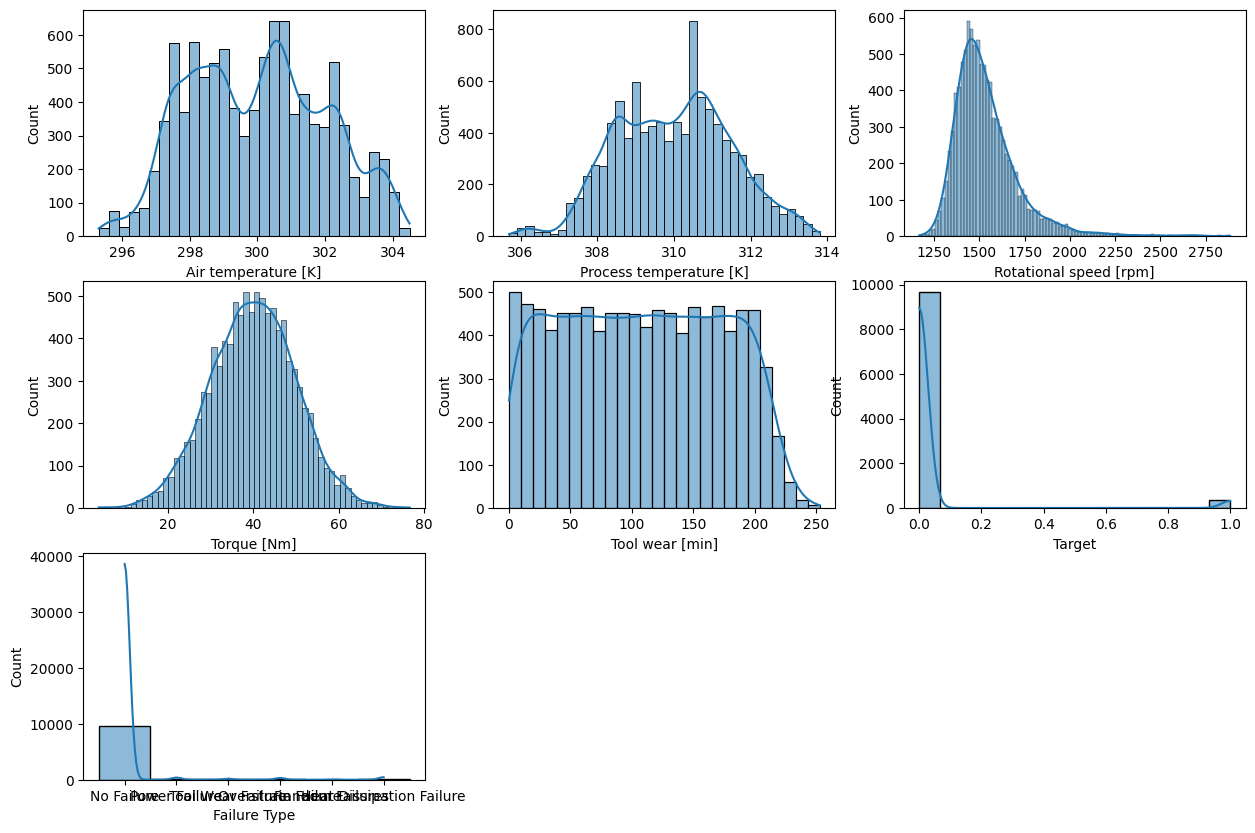

In [447]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>],
       [<Axes: title={'center': 'Tool wear [min]'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

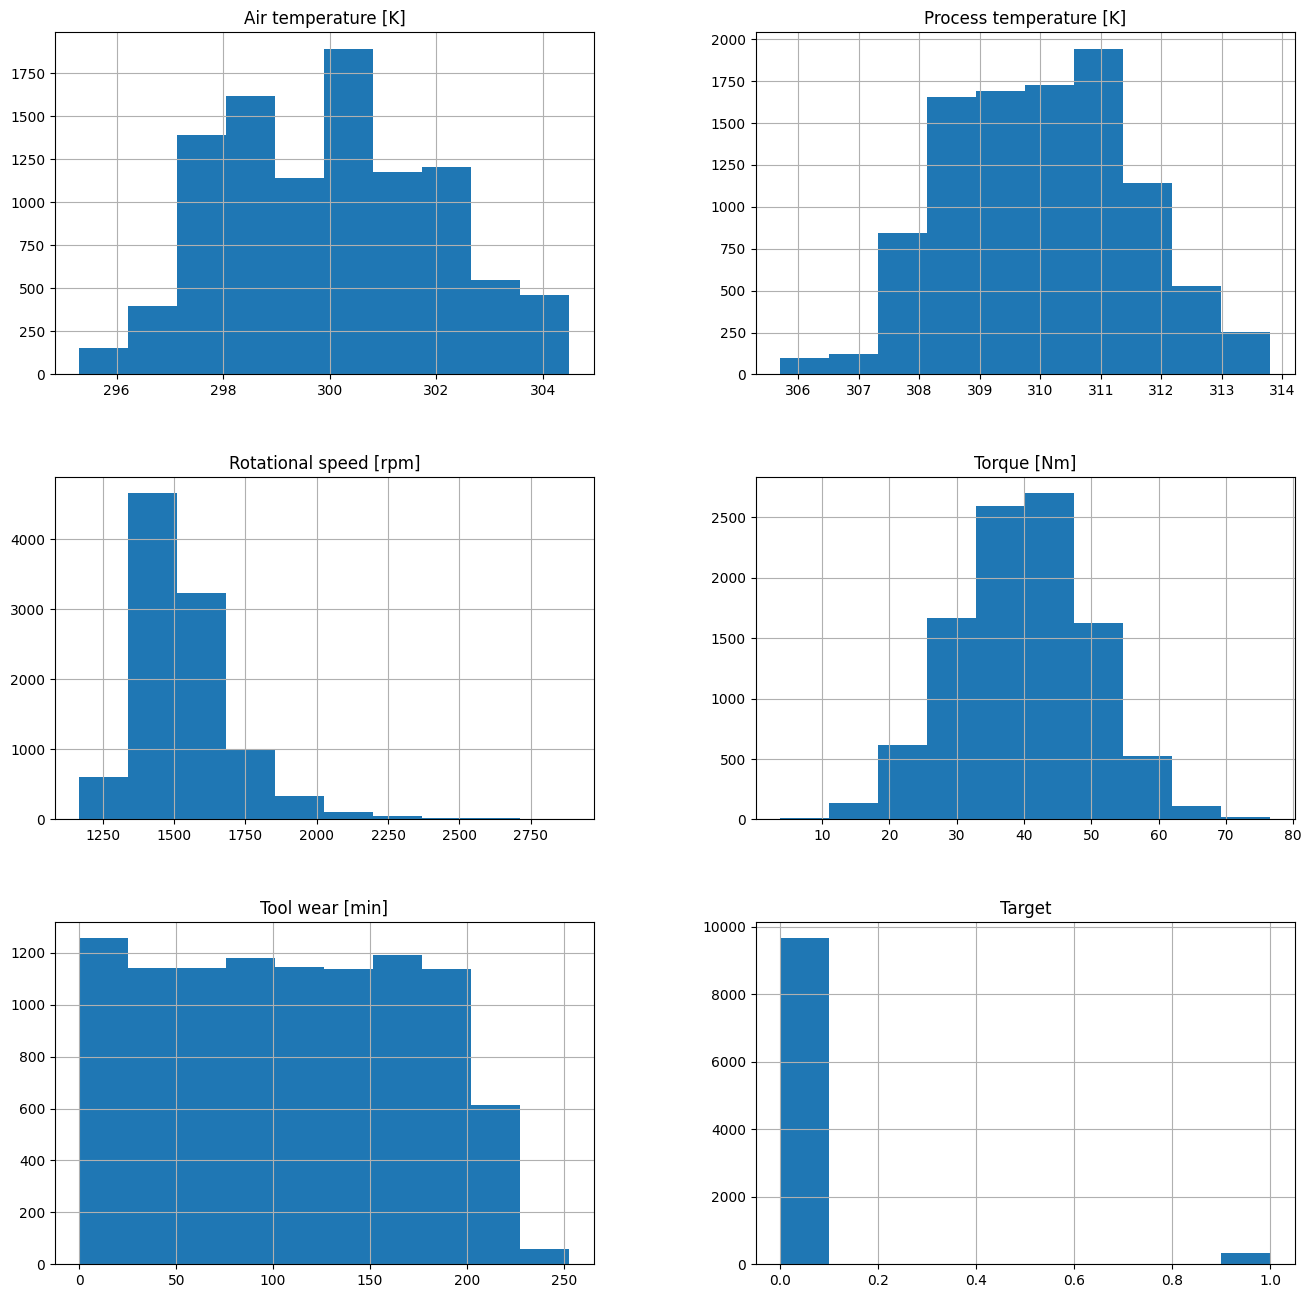

In [448]:
df.hist(figsize=(16, 16))

In [455]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


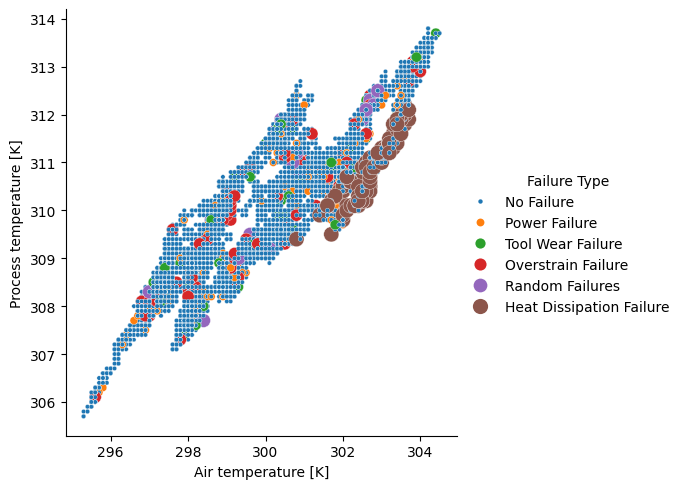

In [456]:
_= sns.relplot(x="Air temperature [K]", y="Process temperature [K]", hue="Failure Type", size="Failure Type",sizes=(120,10),data=df)

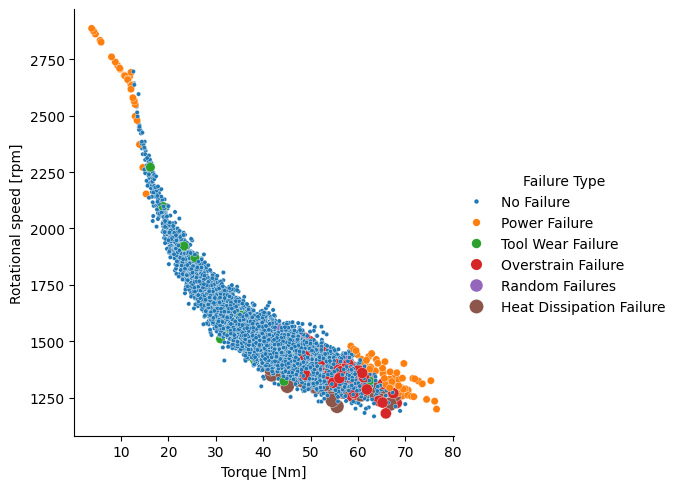

In [457]:
_ = sns.relplot(x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type", size="Failure Type",sizes=(100,10),data=df)

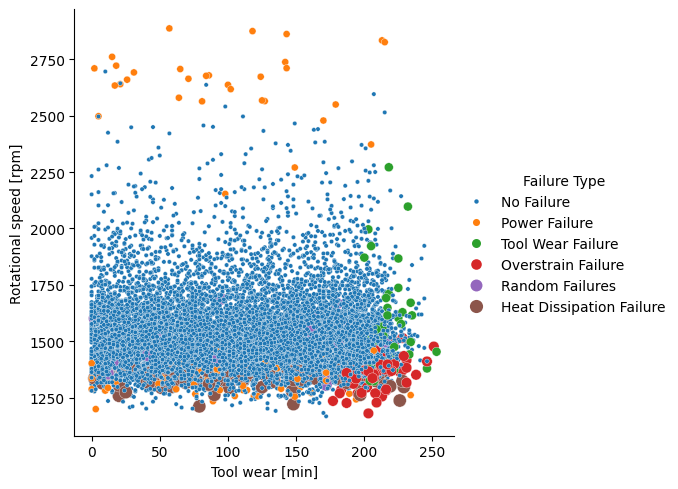

In [458]:
_ = sns.relplot(x="Tool wear [min]", y="Rotational speed [rpm]", hue="Failure Type", size="Failure Type",sizes=(90,10),data=df)

In [459]:
col_name=df.columns.to_list()

In [460]:
predictive_columns=col_name[0:5]
x=df[predictive_columns]
y=df["Failure Type"]

In [461]:

from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state=42)
x1_res,y1_res = smote.fit_resample(x,y)


In [462]:
x1_res.shape

(57862, 5)

In [463]:
df_x=pd.DataFrame(x1_res)

In [464]:
df_y=pd.DataFrame(y1_res)

In [465]:
df1 = pd.concat([df_x,df_y], axis=1)

In [466]:
df1['Failure Type'].value_counts()

Failure Type
Overstrain Failure          9652
Heat Dissipation Failure    9648
Tool Wear Failure           9647
Power Failure               9645
Random Failures             9643
No Failure                  9627
Name: count, dtype: int64

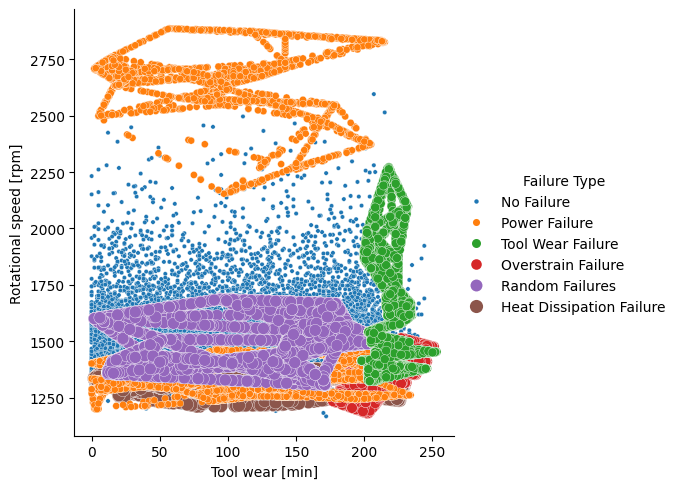

In [467]:
_ = sns.relplot(x="Tool wear [min]",
                y="Rotational speed [rpm]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(90,10),
                data=df1)

In [468]:
col_name=df.columns.to_list()

In [469]:
predictive_columns=col_name[0:5]
x=df1[predictive_columns]
y=df1["Failure Type"]

In [470]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=None)
for train_index,test_index in skf.split(x,y):
    x1_train,x1_test = x.iloc[train_index],x.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
    train_0, train_1 = len(y1_train[y1_train==0]), len(y1_train[y1_train==1])
    test_0, test_1 = len(y1_test[y1_test==0]), len(y1_test[y1_test==1])
    print('train: 0=%d, 1=%d, test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

    

train: 0=0, 1=0, test: 0=0, 1=0
train: 0=0, 1=0, test: 0=0, 1=0
train: 0=0, 1=0, test: 0=0, 1=0
train: 0=0, 1=0, test: 0=0, 1=0
train: 0=0, 1=0, test: 0=0, 1=0


In [481]:
# create train/test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=40, test_size=0.33, stratify=y)


In [472]:
# build categorical preprocessor
categorical_cols = x.select_dtypes(include="object").columns.to_list()
categorical_pipe = make_pipeline(OneHotEncoder(sparse_output=False, handle_unknown= "ignore"))

In [482]:
# build numeric processor
to_log = ["Rotational speed [rpm]", "Tool wear [min]"]
to_scale = ["Air temperature [K]", "Process temperature [K]", "Torque [Nm]"]
numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

In [483]:
# full processor
full = ColumnTransformer(
    transformers=[
        ("categorical", categorical_pipe, categorical_cols),
        ("Power_transform", numeric_pipe_1, to_log),
        ("standardization", numeric_pipe_2, to_scale),])

In [484]:
rfc = OutputCodeClassifier(RandomForestClassifier(), code_size=6, random_state=40)

In [478]:
# final pipeline combined with RandomForest
Pipeline = Pipeline(
    steps=[("preprocess", full), ("base", rfc,),])


In [485]:
# final pipeline combined with RandomForest
from sklearn.pipeline import Pipeline
Pipeline = Pipeline(
    steps=[("preprocess", full), ("base", rfc,),])

In [486]:
model_rfc = Pipeline.fit(x_train, y_train)
y_pred_rfc = model_rfc.predict(x_test)

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.99      1.00      0.99      3184
              No Failure       0.99      0.93      0.96      3177
      Overstrain Failure       0.98      1.00      0.99      3185
           Power Failure       0.99      0.99      0.99      3183
         Random Failures       0.98      0.99      0.99      3182
       Tool Wear Failure       0.97      0.99      0.98      3184

                accuracy                           0.99     19095
               macro avg       0.99      0.99      0.99     19095
            weighted avg       0.99      0.99      0.99     19095



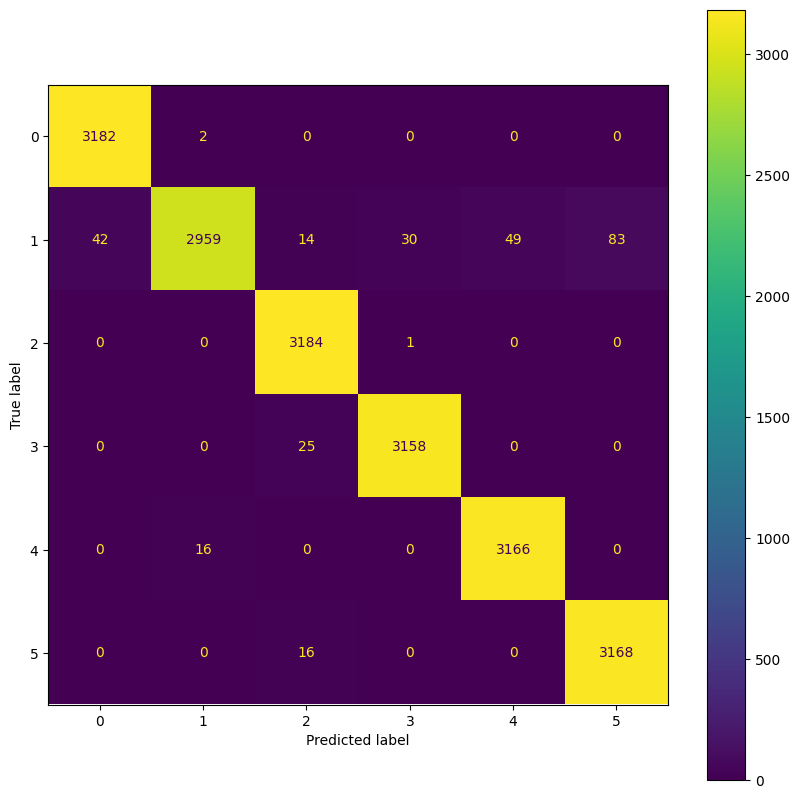

In [487]:
# plot the ocnfusion matrix
fig, ax = plt.subplots(figsize=(10,10))
print(classification_report(y_test, y_pred_rfc))
# create the matrix
cm = confusion_matrix(y_test, y_pred_rfc)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmp.plot(ax=ax)
plt.show();


In [38]:
print(classification_report(y_test, y_pred_rfc))

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.99      1.00      0.99      3184
              No Failure       0.99      0.93      0.96      3177
      Overstrain Failure       0.98      1.00      0.99      3185
           Power Failure       0.99      0.99      0.99      3183
         Random Failures       0.99      0.99      0.99      3182
       Tool Wear Failure       0.97      1.00      0.98      3184

                accuracy                           0.99     19095
               macro avg       0.99      0.99      0.99     19095
            weighted avg       0.99      0.99      0.99     19095



In [39]:
print("accuracy_score: %.4f" %(accuracy_score(y_test, y_pred_rfc)))
print("Matthews correlation coefficient: %4f" %(matthews_corrcoef(y_test, y_pred_rfc)))

accuracy_score: 0.9856
Matthews correlation coefficient: 0.982797


In [61]:
lgbm = OutputCodeClassifier(LGBMClassifier(), code_size=6, random_state=42)

In [123]:
# final pipeline combined with randomforest 
from sklearn.pipeline import Pipeline
Pipeline_lgbm = Pipeline(
    steps=[
        ("preprocess", full),
        ("base", lgbm,),])

In [138]:
model_lgbm = Pipeline_lgbm.fit(x1_res, y1_res)
y_pred_lgbm = model_lgbm.predict(x_test)


[LightGBM] [Info] Number of positive: 19300, number of negative: 38562
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 57862, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333552 -> initscore=-0.692162
[LightGBM] [Info] Start training from score -0.692162
[LightGBM] [Info] Number of positive: 48217, number of negative: 9645
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 57862, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.833310 -> initscore=1.609272
[LightGBM] [Info] Start training from score 1.609272
[LightGBM] [Info]

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      3184
              No Failure       1.00      0.95      0.98      3177
      Overstrain Failure       1.00      1.00      1.00      3185
           Power Failure       1.00      1.00      1.00      3183
         Random Failures       0.98      1.00      0.99      3182
       Tool Wear Failure       0.98      1.00      0.99      3184

                accuracy                           0.99     19095
               macro avg       0.99      0.99      0.99     19095
            weighted avg       0.99      0.99      0.99     19095



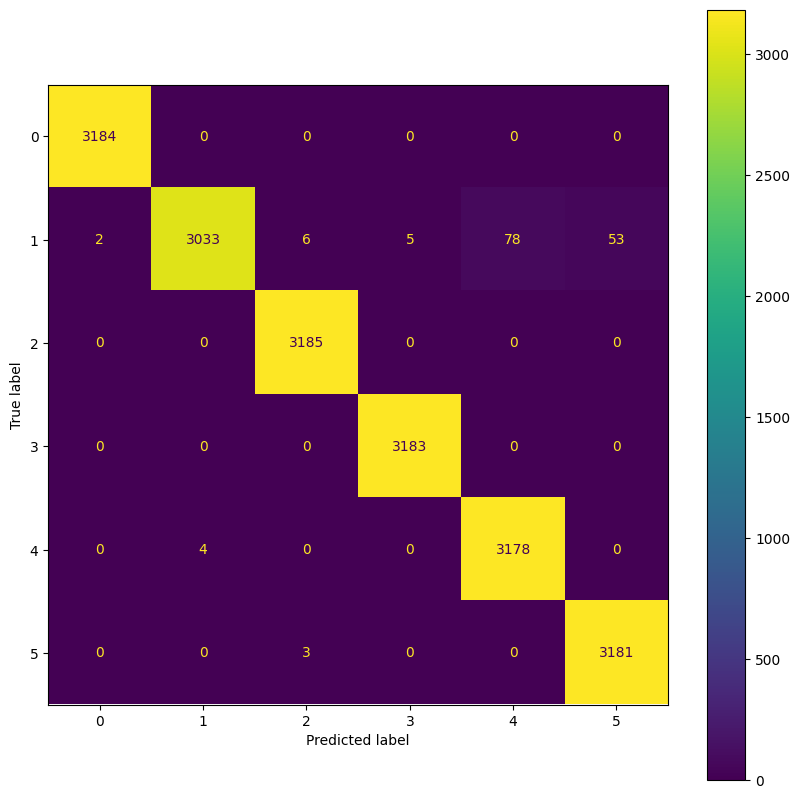

In [141]:
#plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
print(classification_report(y_test, y_pred_lgbm))
# create the matrix
cm = confusion_matrix(y_test, y_pred_lgbm)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmp.plot(ax=ax)
plt.show();

In [136]:
print("accuracy_score: %.4f" %(accuracy_score(y_test, y_pred_lgbm)))
print("Matthews correlation coefficient: %4f" %(matthews_corrcoef(y_test, y_pred_lgbm)))

accuracy_score: 0.9921
Matthews correlation coefficient: 0.990556


In [148]:
from xgboost import XGBClassifier

In [149]:
xgb = OutputCodeClassifier(XGBClassifier(), code_size=6, random_state=42)

In [150]:
# final pipeline combined with randomforest
Pipeline_xgb = Pipeline(
    steps=[("preprocess", full), ("base", xgb)])

In [151]:
model_xgb = Pipeline_xgb.fit(x1_res, y1_res)
y_pred_xgb = model_xgb.predict(x_test)

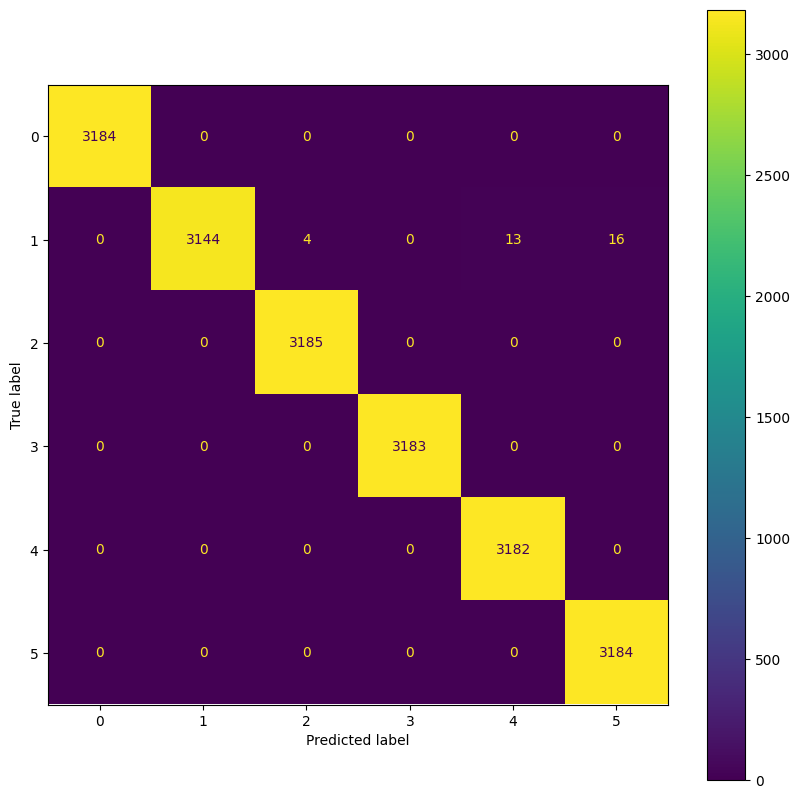

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      3184
              No Failure       1.00      0.99      0.99      3177
      Overstrain Failure       1.00      1.00      1.00      3185
           Power Failure       1.00      1.00      1.00      3183
         Random Failures       1.00      1.00      1.00      3182
       Tool Wear Failure       0.99      1.00      1.00      3184

                accuracy                           1.00     19095
               macro avg       1.00      1.00      1.00     19095
            weighted avg       1.00      1.00      1.00     19095



In [152]:
#plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
# create the matrix
cm = confusion_matrix(y_test, y_pred_xgb)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, y_pred_xgb))

In [155]:
from catboost import  CatBoostClassifier, Pool, cv

In [156]:
catb = OutputCodeClassifier(CatBoostClassifier(random_seed=42,logging_level='Silent'), code_size=6, random_state=42)

In [157]:
Pipeline_catb = Pipeline(steps=[("preprocess", full), ("bsse", catb)])

In [158]:
model_catb = catb.fit(x1_res, y1_res)
y_pred_catb = model_catb.predict(x_test)

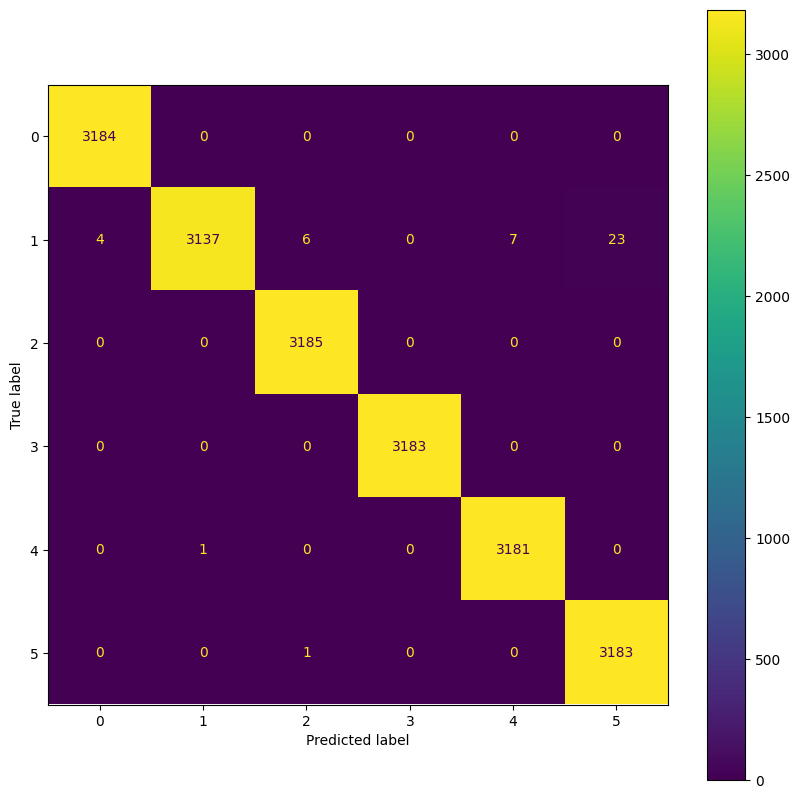

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      3184
              No Failure       1.00      0.99      0.99      3177
      Overstrain Failure       1.00      1.00      1.00      3185
           Power Failure       1.00      1.00      1.00      3183
         Random Failures       1.00      1.00      1.00      3182
       Tool Wear Failure       0.99      1.00      1.00      3184

                accuracy                           1.00     19095
               macro avg       1.00      1.00      1.00     19095
            weighted avg       1.00      1.00      1.00     19095



In [159]:
#plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))

# create the matrix
cm = confusion_matrix(y_test, y_pred_catb)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, y_pred_catb))

In [160]:
print("accuracy_score: %.4f" %(accuracy_score(y_test, y_pred_catb)))
print("Matthews correlation coefficient: %4f" %(matthews_corrcoef(y_test, y_pred_catb)))

accuracy_score: 0.9978
Matthews correlation coefficient: 0.997364


In [165]:
from sklearn.multiclass import OneVsOneClassifier

In [167]:
catb_ov = CatBoostClassifier()
ovr = OneVsOneClassifier(catb_ov)

In [168]:
ovr.fit(x1_res, y1_res)
yhat_ovr = ovr.predict(x_test)

Learning rate set to 0.036444
0:	learn: 0.5988934	total: 29.5ms	remaining: 29.4s
1:	learn: 0.5176209	total: 54.5ms	remaining: 27.2s
2:	learn: 0.4495741	total: 81.9ms	remaining: 27.2s
3:	learn: 0.3911432	total: 108ms	remaining: 26.8s
4:	learn: 0.3341505	total: 131ms	remaining: 26s
5:	learn: 0.2901304	total: 149ms	remaining: 24.6s
6:	learn: 0.2548037	total: 166ms	remaining: 23.6s
7:	learn: 0.2263144	total: 186ms	remaining: 23s
8:	learn: 0.1951059	total: 211ms	remaining: 23.3s
9:	learn: 0.1730861	total: 248ms	remaining: 24.6s
10:	learn: 0.1553071	total: 286ms	remaining: 25.7s
11:	learn: 0.1402413	total: 313ms	remaining: 25.7s
12:	learn: 0.1254274	total: 337ms	remaining: 25.6s
13:	learn: 0.1125727	total: 364ms	remaining: 25.7s
14:	learn: 0.1006788	total: 390ms	remaining: 25.6s
15:	learn: 0.0904914	total: 416ms	remaining: 25.6s
16:	learn: 0.0829630	total: 442ms	remaining: 25.5s
17:	learn: 0.0770682	total: 476ms	remaining: 26s
18:	learn: 0.0721065	total: 501ms	remaining: 25.8s
19:	learn: 0.0

In [170]:
#final pipeline combined with randomforest
Pipeline_catb = Pipeline(steps=[("preprocess", full), ("bsse", ovr)])

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      3184
              No Failure       1.00      1.00      1.00      3177
      Overstrain Failure       1.00      1.00      1.00      3185
           Power Failure       1.00      1.00      1.00      3183
         Random Failures       1.00      1.00      1.00      3182
       Tool Wear Failure       1.00      1.00      1.00      3184

                accuracy                           1.00     19095
               macro avg       1.00      1.00      1.00     19095
            weighted avg       1.00      1.00      1.00     19095



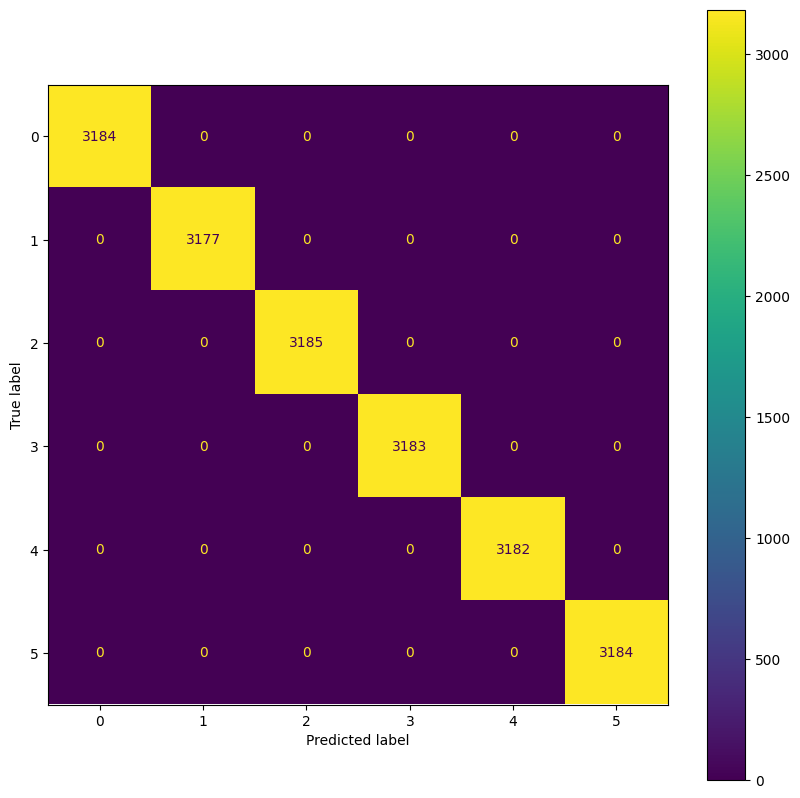

In [497]:
#plot the confusion matrix
fig, ax = plt.subplots(figsize=(10,10))
print(classification_report(y_test, yhat_ovr))

# create the matrix
cm = confusion_matrix(y_test, yhat_ovr)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmp.plot(ax=ax)
plt.show();


In [172]:
print("balanced accuracy score: %.4f" %(balanced_accuracy_score(y_test, yhat_ovr)))
print("accuracy_score: %.4f" %(accuracy_score(y_test, yhat_ovr)))
print("Matthews correlation coefficient: %4f" %(matthews_corrcoef(y_test, yhat_ovr)))

balanced accuracy score: 0.9983
accuracy_score: 0.9983
Matthews correlation coefficient: 0.997991


In [173]:
catb_ovo = CatBoostClassifier()
ovo = OneVsOneClassifier(catb_ovo)

In [174]:
ovo.fit(x1_res, y1_res)
yhat_ovo = ovo.predict(x_test)

Learning rate set to 0.036444
0:	learn: 0.5988934	total: 34ms	remaining: 34s
1:	learn: 0.5176209	total: 65ms	remaining: 32.4s
2:	learn: 0.4495741	total: 93ms	remaining: 30.9s
3:	learn: 0.3911432	total: 125ms	remaining: 31s
4:	learn: 0.3341505	total: 165ms	remaining: 32.8s
5:	learn: 0.2901304	total: 193ms	remaining: 31.9s
6:	learn: 0.2548037	total: 222ms	remaining: 31.6s
7:	learn: 0.2263144	total: 270ms	remaining: 33.5s
8:	learn: 0.1951059	total: 307ms	remaining: 33.8s
9:	learn: 0.1730861	total: 333ms	remaining: 32.9s
10:	learn: 0.1553071	total: 353ms	remaining: 31.7s
11:	learn: 0.1402413	total: 371ms	remaining: 30.6s
12:	learn: 0.1254274	total: 397ms	remaining: 30.1s
13:	learn: 0.1125727	total: 424ms	remaining: 29.9s
14:	learn: 0.1006788	total: 450ms	remaining: 29.6s
15:	learn: 0.0904914	total: 494ms	remaining: 30.4s
16:	learn: 0.0829630	total: 516ms	remaining: 29.9s
17:	learn: 0.0770682	total: 536ms	remaining: 29.2s
18:	learn: 0.0721065	total: 561ms	remaining: 29s
19:	learn: 0.0670728

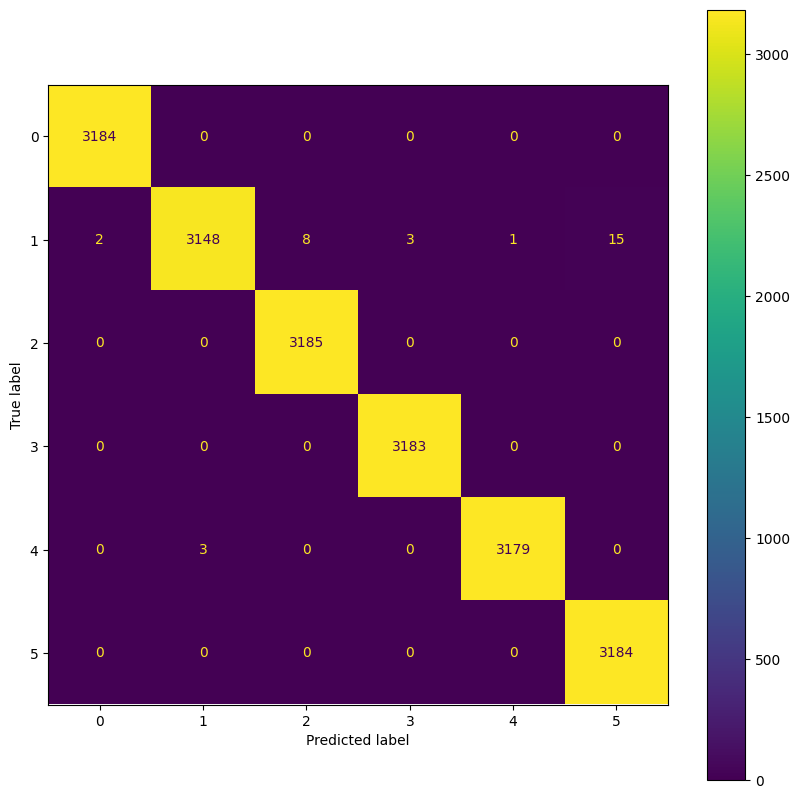

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      3184
              No Failure       1.00      0.99      0.99      3177
      Overstrain Failure       1.00      1.00      1.00      3185
           Power Failure       1.00      1.00      1.00      3183
         Random Failures       1.00      1.00      1.00      3182
       Tool Wear Failure       1.00      1.00      1.00      3184

                accuracy                           1.00     19095
               macro avg       1.00      1.00      1.00     19095
            weighted avg       1.00      1.00      1.00     19095



In [498]:
#plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))

# create the matrix
cm = confusion_matrix(y_test, yhat_ovo)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, yhat_ovo))

In [183]:
print("balanced accuracy score: %.4f" %(balanced_accuracy_score(y_test, yhat_ovo)))
print("accuracy_score: %.4f" %(accuracy_score(y_test, yhat_ovo)))
print("Matthews correlation coefficient: %4f" %(matthews_corrcoef(y_test, yhat_ovo)))

balanced accuracy score: 0.9983
accuracy_score: 0.9983
Matthews correlation coefficient: 0.997991


In [184]:
rfc_ov = RandomForestClassifier()

In [185]:
from sklearn.multiclass import OneVsRestClassifier

In [187]:
ovr = OneVsRestClassifier(rfc_ov)
ovr.fit(x1_res, y1_res)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [453]:
yhat_ovr = ovr.predict(x_test)

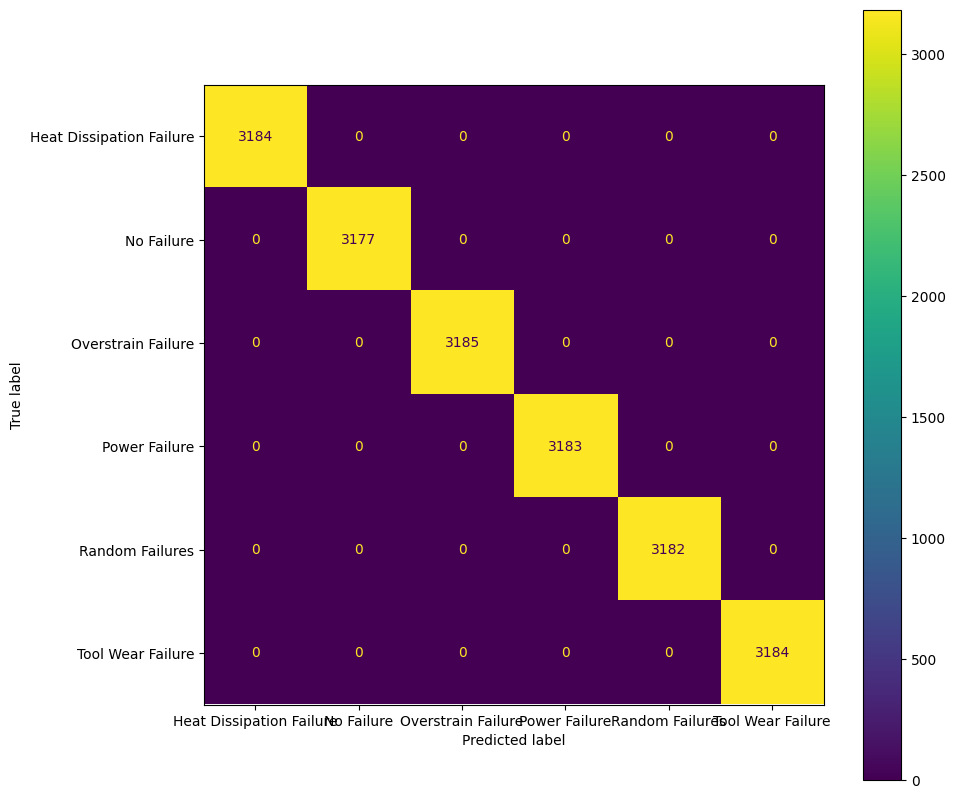

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      3184
              No Failure       1.00      1.00      1.00      3177
      Overstrain Failure       1.00      1.00      1.00      3185
           Power Failure       1.00      1.00      1.00      3183
         Random Failures       1.00      1.00      1.00      3182
       Tool Wear Failure       1.00      1.00      1.00      3184

                accuracy                           1.00     19095
               macro avg       1.00      1.00      1.00     19095
            weighted avg       1.00      1.00      1.00     19095



In [523]:
#plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))

# create the matrix
cm = confusion_matrix(y_test, yhat_ovr)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, yhat_ovr))

In [500]:
print("balanced accuracy score: %.4f" %(balanced_accuracy_score(y_test, yhat_ovr)))
print("accuracy_score: %.4f" %(accuracy_score(y_test, yhat_ovr)))
print("Matthews correlation coefficient: %4f" %(matthews_corrcoef(y_test, yhat_ovr)))

balanced accuracy score: 1.0000
accuracy_score: 1.0000
Matthews correlation coefficient: 1.000000


In [501]:
ovo = OneVsOneClassifier(rfc_ov)

In [502]:
ovo.fit(x1_res, y1_res)
yhat_ovo = ovo.predict(x_test)

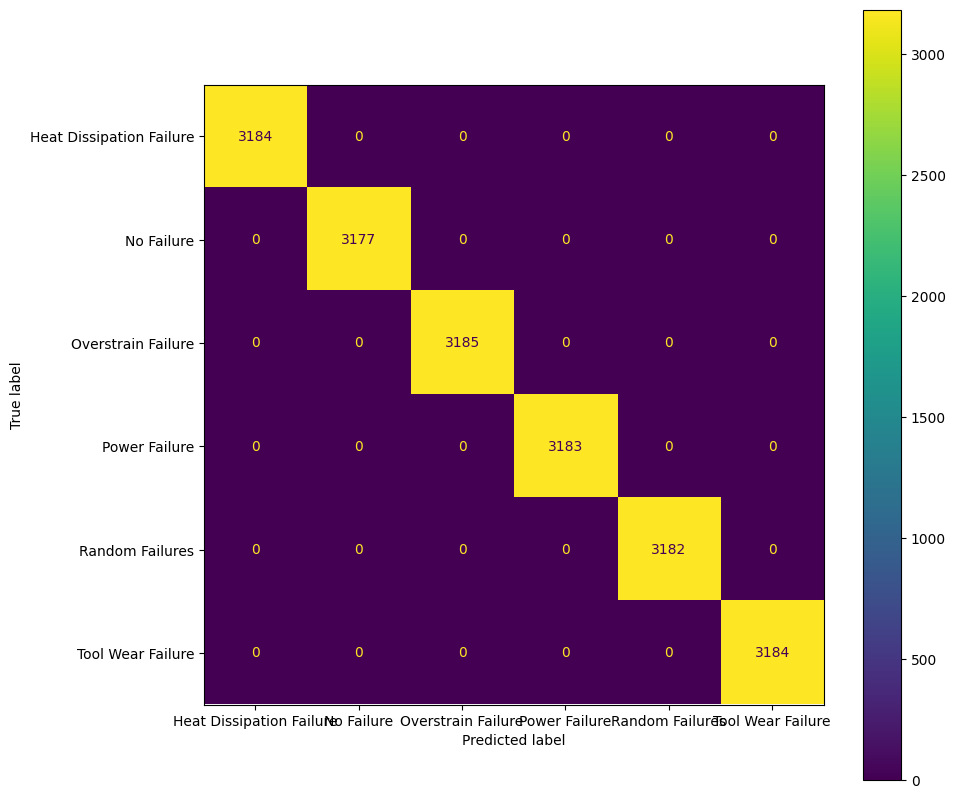

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      3184
              No Failure       1.00      1.00      1.00      3177
      Overstrain Failure       1.00      1.00      1.00      3185
           Power Failure       1.00      1.00      1.00      3183
         Random Failures       1.00      1.00      1.00      3182
       Tool Wear Failure       1.00      1.00      1.00      3184

                accuracy                           1.00     19095
               macro avg       1.00      1.00      1.00     19095
            weighted avg       1.00      1.00      1.00     19095



In [521]:
#plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))

# create the matrix
cm = confusion_matrix(y_test, yhat_ovo)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, yhat_ovo))

In [504]:
print("balanced accuracy score: %.4f" %(balanced_accuracy_score(y_test, yhat_ovo)))
print("accuracy_score: %.4f" %(accuracy_score(y_test, yhat_ovo)))
print("Matthews correlation coefficient: %4f" %(matthews_corrcoef(y_test, yhat_ovo)))

balanced accuracy score: 1.0000
accuracy_score: 1.0000
Matthews correlation coefficient: 1.000000
